# Projeto IA - Classificação de diagnóstico de pneumonia

Este projeto tem como objetivo a classificação de diagnóstico de pneumonia em imagens de raio-x de tórax. O dataset utilizado foi obtido no Kaggle e pode ser encontrado [aqui](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia).

O dataset é composto por 5.856 imagens de raio-x de tórax, sendo 4.232 imagens de pacientes diagnosticados com pneumonia e 1.624 imagens de pacientes saudáveis. As imagens estão divididas em 3 pastas: `train`, `test` e `val` (para fazer a validação), sendo que a pasta `train` contém 5.216 imagens, a pasta `test` contém 624 imagens e a pasta `val` contém 16 imagens.

O dataset utilizado teve validação de 3 especialistas clínicos para filtrar as imagens usadas e para certificar o que foi classificado em cada pasta como "NORMAL" ou "PNEUMONIA".

## Rodar o projeto:

Faça a instalação do Python 3.10+ na máquina (recomendo usar o venv), instale o PIP para baixar as dependências e execute o comando abaixo para instalar as dependências necessárias:

```bash
pip install tensorflow keras scipy numpy matplotlib opencv-python kagglehub
```

Esse comando instalará o TensorFlow, Keras, SciPy (que serve como dependência do Keras), NumPy, Matplotlib, OpenCV e KaggleHub.

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub

path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset: ", path)

train_dir = f'{path}/chest_xray/train'
val_dir = f'{path}/chest_xray/val'
test_dir = f'{path}/chest_xray/test'

IMG_SIZE = 150

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)

Path to dataset:  /home/santiago/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Saída binária: pneumonia ou não
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

/home/santiago/Dev/pneumo/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 272ms/step - accuracy: 0.7701 - loss: 0.5684 - val_accuracy: 0.8125 - val_loss: 0.4357
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 38s 234ms/step - accuracy: 0.8739 - loss: 0.2870 - val_accuracy: 0.7500 - val_loss: 0.7364
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 38s 230ms/step - accuracy: 0.9097 - loss: 0.2369 - val_accuracy: 0.8125 - val_loss: 0.4933
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 269ms/step - accuracy: 0.8982 - loss: 0.2545 - val_accuracy: 0.6875 - val_loss: 0.6861
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 32s 233ms/step - accuracy: 0.9070 - loss: 0.2214 - val_accuracy: 0.8125 - val_loss: 0.3605
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 38s 231ms/step - accuracy: 0.9189 - loss: 0.2086 - val_accuracy: 0.7500 - val_loss: 0.8942
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 38s 233ms/step - accuracy: 0.9226 - loss: 0.1995 - val_accuracy: 0.8125 - val_loss: 0.5514
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 38s 231ms/step - accuracy: 0.9322 - loss: 0

In [24]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Acurácia no conjunto de teste: {test_acc * 100:.2f}%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.8660 - loss: 0.4099
Acurácia no conjunto de teste: 88.14%



======= Acurácia de validação =======
Valor da acurácia da época 1: 0.81
Valor da acurácia da época 2: 0.75
Valor da acurácia da época 3: 0.81
Valor da acurácia da época 4: 0.69
Valor da acurácia da época 5: 0.81
Valor da acurácia da época 6: 0.75
Valor da acurácia da época 7: 0.81
Valor da acurácia da época 8: 0.69
Valor da acurácia da época 9: 0.88
Valor da acurácia da época 10: 0.81


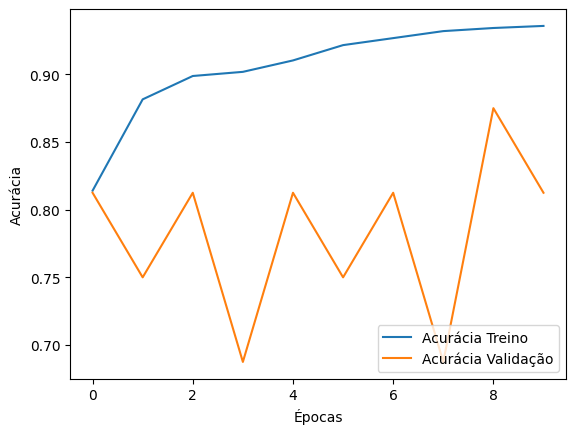

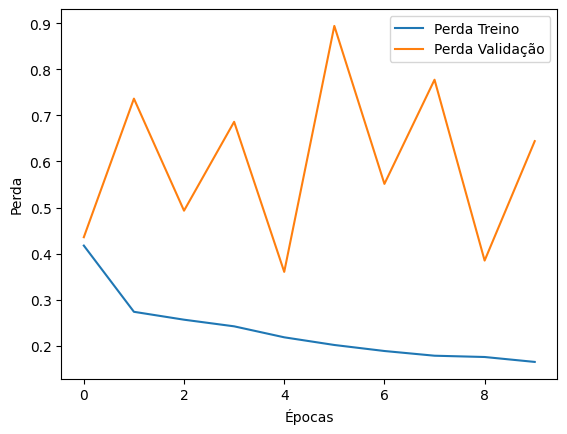

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
# print(f"Quantidade de épocas: {len(history.history['accuracy'])}")
# for i in range(len(history.history['accuracy'])):
#     print(f"Valor da acurácia da época {i + 1}: {history.history['accuracy'][i]:.2f}")

print(f"\n======= Acurácia de validação =======")
for i in range(len(history.history['val_accuracy'])):
    print(f"Valor da acurácia da época {i + 1}: {history.history['val_accuracy'][i]:.2f}")
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Perda Treino')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(loc='upper right')
plt.show()
